## Librerias

In [201]:
import glob
import os

from matplotlib import rcParams
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style

from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

## Glosario y datasets

In [ ]:
"""Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
Fantasy
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Players age on December 31st of that year
Games
G -- Games played
GS -- Games started as an offensive or defensive player
Passing
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Rushing
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Receiving
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fumbles
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
Scoring
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
Fantasy
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline)
Rk -- Rank
This is a count of the rows from top to bottom.
It is recalculated following the sorting of a column.
FantPos -- Fantasy position: QB, RB, WR, or TE
Age -- Player's age on December 31st of that year
G -- Games played
GS -- Games started as an offensive or defensive player
Cmp -- Passes completed
Att -- Passes attempted
Yds -- Yards Gained by Passing
For teams, sack yardage is deducted from this total
TD -- Passing Touchdowns
Int -- Interceptions thrown
Att -- Rushing Attempts (sacks not included in NFL)
Yds -- Rushing Yards Gained (sack yardage is not included by NFL)
Y/A -- Rushing Yards per Attempt
Minimum 6.25 rushes per game scheduled to qualify as leader.
Minimum 750 rushes to qualify as career leader.
TD -- Rushing Touchdowns
Tgt -- Pass Targets (since 1992, derived from NFL play-by-play data)
Rec -- Receptions
Yds -- Receiving Yards
Y/R -- Receiving Yards per Reception
Minimum 1.875 catches per game scheduled to qualify as leader.
Minimum 200 receptions to qualify as career leader.
TD -- Receiving Touchdowns
Fmb -- Number of times fumbled both lost and recovered by own team
These represent ALL fumbles by the player on offense, defense, and special teams.
Available for player games since 1990.
FL -- Fumbles Lost by Player (since 1994) or Team
TD -- Touchdowns of every type
2PM -- Two-Point Conversions Made
2PP -- Two-Point Conversion Passes
FantPt -- Fantasy points:
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
PPR -- Fantasy points (PPR scoring):
1 point per 25 yards passing
4 points per passing touchdown
-2 points per interception thrown
1 point per reception
1 point per 10 yards rushing/receiving
6 points per TD
2 points per two-point conversion
-2 points per fumble lost (est. prior to 1994)
DKPt -- Fantasy points (DraftKings scoring)
FDPt -- Fantasy points (FanDuel scoring)
VBD -- VBD: popularized by Joe Bryant in the 90s,
this is the players fantasy points minus the fantasy points of the baseline player,
where the baseline player is the 12th-ranked QB,
the 24th-ranked RB,
the 30th-ranked WR,
or the 12th-ranked TE
PosRank -- The players fantasy rank within his position
OvRank -- The players overall fantasy rank (blank if the player was below the baseline) """

In [577]:
jug_2019 = pd.read_csv("data/data-master/data-master/yearly/jugadores_2019.csv", header=[1])
jug_2019["year"] = np.where(jug_2019["Player"] == 2019, '2019', '2019')
jug_2020 = pd.read_csv("data/data-master/data-master/yearly/jugadores_2020.csv", header=[1])
jug_2020["year"] = np.where(jug_2020["Player"] == 2020, '2020', '2020')
jug_2021 = pd.read_csv("data/data-master/data-master/yearly/jugadores_2021.csv", header=[1])
jug_2021["year"] = np.where(jug_2021["Player"] == 2021, '2021', '2021')
###jug_2022 = pd.read_csv("data/data-master/data-master/yearly/jugadores_2022.csv", header=[1])
###jug_2022["year"] = np.where(jug_2022["Player"] == 2022, '2022', '2022')
###

Creo los datasets por posicion y creo una columna que dice el a;o. para despues hacer 4 datasets de las defensas contra las distintas posiciones con los 4 a;os adentro asi poder identificar cuando obtuvieron esos datos.

## preprocesamiento

In [579]:
###jugadores = pd.concat([jug_2019, jug_2020, jug_2021, jug_2022], axis=0, ).reset_index()
jugadores = pd.concat([jug_2019, jug_2020, jug_2021], axis=0, ).reset_index()
jugadores.columns

Index(['index', 'Rk', 'Player', 'Tm', 'FantPos', 'Age', 'G', 'GS', 'Cmp',
       'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1', 'Y/A', 'TD.1', 'Tgt',
       'Rec', 'Yds.2', 'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3', '2PM', '2PP',
       'FantPt', 'PPR', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', ' nm',
       'year', '-9999'],
      dtype='object')

In [580]:
jugadores.columns = ["index", "rank", "player", "team", "pos", "age", "games", "games_started", "pass_comp", "pass_att", "pass_yds","pass_tds", "ints", "rushing_att", "rush_yds", "yds_x_att", "rush_tds", "targets", "rec", "rec_yds", "yds_x_rec", "rec_tds", "fumbles", "fum_lst", "td_tot", "dos_pt_conv", "pases_dos_pt",'FantPt', 'PPR', 'DKPt', 'FDPt', 'VBD', 'posrank', 'OvRank', ' nm',
       'year', '-9999']

hago lo mismo que antes solo que con el dataset de jugadores

In [581]:
jugadores = jugadores.drop(columns={'FantPt', 'DKPt', 'FDPt', 'VBD', ' nm', '-9999', 'OvRank', 'index'})

saco las columnas que son irrelevantes

In [511]:
jugadores.duplicated().sum()

0

no hay filas duplicadas en ningun dataset

In [661]:
jugadores = jugadores.loc[jugadores["PPR"] > 60]
jugadores['pts_x_gm'] = jugadores['PPR'] / jugadores['games']
jugadores["td_x_gm"] = jugadores["td_tot"]/ jugadores["games"]

saco todos los jugadores que hicieron menos de 60 pts porque si hicieron menos de 50 pts significa que practicamente no jugaron, siendo irrelevantes para el analisis. y creo la columna pts por partido y td por partido para despues poder encontrar una prediccion

In [583]:
jugadores.yds_x_att =  jugadores.yds_x_att.fillna(0)
jugadores.dos_pt_conv = jugadores.dos_pt_conv.fillna(0)
jugadores.pases_dos_pt = jugadores.pases_dos_pt.fillna(0)
jugadores.yds_x_rec = jugadores.yds_x_rec.fillna(0)

saco todos los valores que son NA y los convierto en 0 porque deberian ser 0

In [662]:
jugadores_rb = jugadores.loc[jugadores["pos"]== "RB"]
jugadores_wr = jugadores.loc[jugadores["pos"]== "WR"]
jugadores_qb = jugadores.loc[jugadores["pos"]== "TE"]
jugadores_te = jugadores.loc[jugadores["pos"]== "QB"]

separo el dataframe jugadores en 4 distintos uno para cada posicion.

In [516]:
jugadores_rb.pts_x_gm.mean()

11.15957215659368

In [664]:
def clasificacion (x):
       if x > jugadores_rb.pts_x_gm.mean():
              return "bueno"
       else: return "malo"


jugadores_rb["clasificacion"] = jugadores_rb["pts_x_gm"].apply(clasificacion)
jugadores_rb


<ipython-input-664-9c3edf93e769>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rank,player,team,pos,age,games,games_started,pass_comp,pass_att,pass_yds,...,fum_lst,td_tot,dos_pt_conv,pases_dos_pt,PPR,posrank,year,pts_x_gm,td_x_gm,clasificacion
0,1,Christian McCaffrey*+,CAR,RB,23,16,16,0.0,2.0,0.0,...,0.0,19,1.0,0.0,471.2,1,2019,29.450000,1.187500,bueno
2,3,Derrick Henry *,TEN,RB,25,15,15,0.0,0.0,0.0,...,3.0,18,0.0,0.0,294.6,2,2019,19.640000,1.200000,bueno
3,4,Aaron Jones,GNB,RB,25,16,16,0.0,0.0,0.0,...,2.0,19,0.0,0.0,314.8,3,2019,19.675000,1.187500,bueno
4,5,Ezekiel Elliott*,DAL,RB,24,16,16,0.0,0.0,0.0,...,2.0,14,0.0,0.0,311.7,4,2019,19.481250,0.875000,bueno
5,6,Dalvin Cook*,MIN,RB,24,14,14,0.0,0.0,0.0,...,2.0,13,0.0,0.0,292.4,5,2019,20.885714,0.928571,bueno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,238,Travis Homer,SEA,RB,23,14,0,0.0,0.0,0.0,...,0.0,2,0.0,0.0,61.8,70,2021,4.414286,0.142857,malo
1516,240,Jeremy McNichols,TEN,RB,26,14,0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,73.6,71,2021,5.257143,0.071429,malo
1521,245,Damien Williams,CHI,RB,29,12,2,0.0,0.0,0.0,...,0.0,3,0.0,0.0,60.7,72,2021,5.058333,0.250000,malo
1523,247,Kyle Juszczyk*,SFO,RB,30,17,16,0.0,0.0,0.0,...,0.0,2,0.0,0.0,73.8,74,2021,4.341176,0.117647,malo


creo una columna nueva llamada clasificacion donde los jugadores que tuvieron mas puntos por partido que el promedio de la liga (de los jugadores que fueron relevantes,aquellos con mas de 60 pts totales) son clasificados como buenos y los que estuvieron debajo del promedio como malos. esta sera nuestra variable target.

<ipython-input-370-1a773d4fa9c7>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

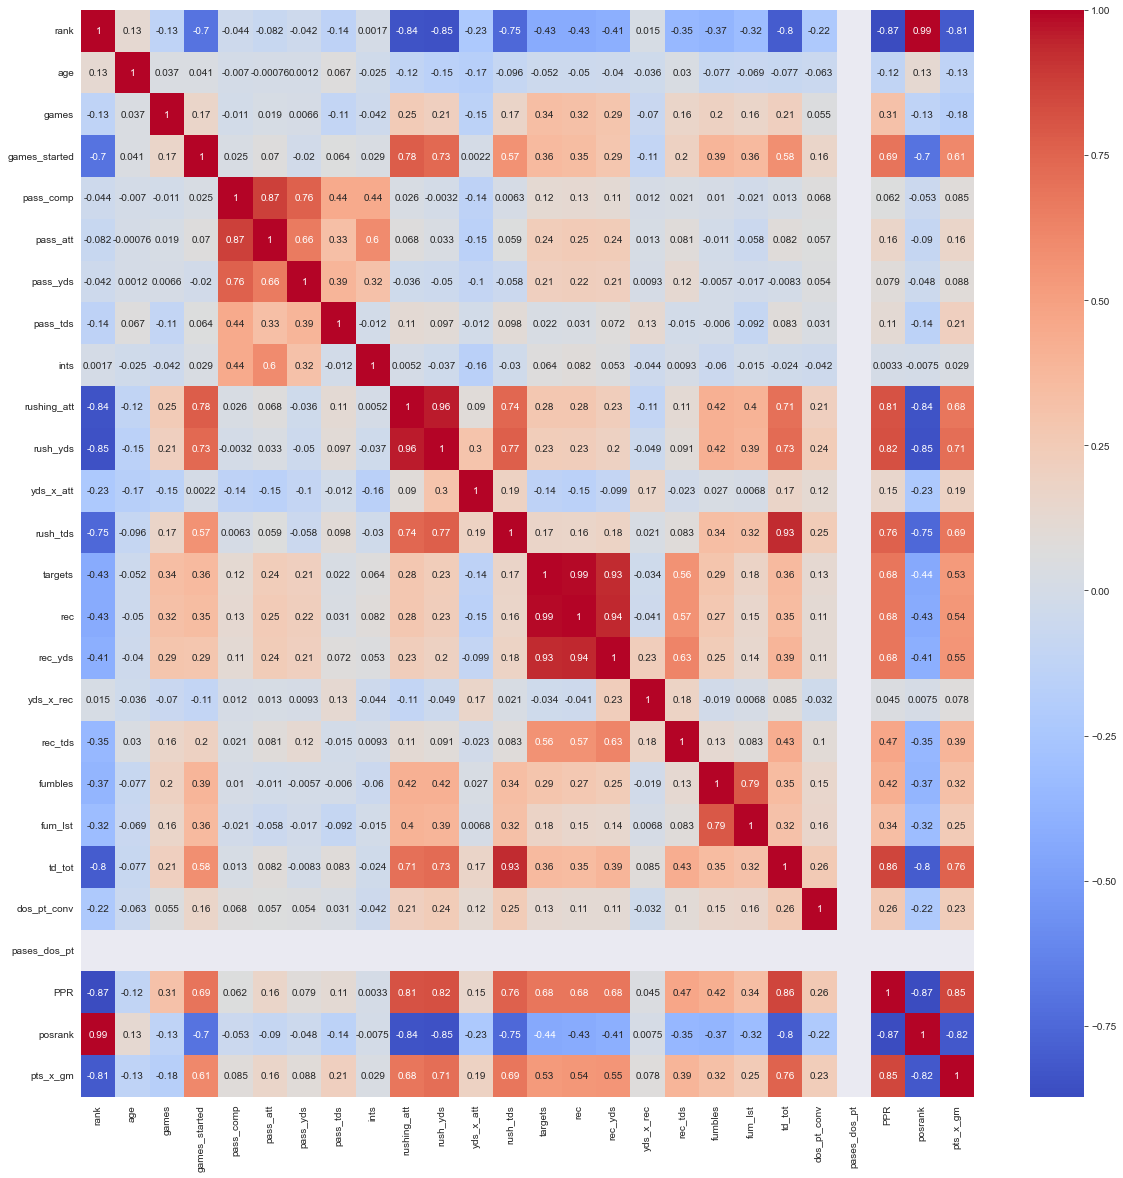

In [370]:
rcParams['figure.figsize'] = 20,20
sns.heatmap(jugadores_rb.corr(),cmap='coolwarm',annot=True)

aca podemos ver cuales son las variables con mas relacion entre ellas, las mas cercanas a 1 significa que tienen una relacion positiva muy fuerte y las mas cercanas a -1 tienen una relacion negativa fuerte.

In [357]:
import plotly.express as px
fig = px.scatter(jugadores_rb, x="td_tot", y="rushing_att", color='player')
fig.show();

aca tenemos un ejemplo claro del heatmap, a medida que mas intentos de acarreos tienen los rbs mayor es la cantidad de anotaciones que tienen, esta correlacion es del 70%

In [344]:
import plotly.express as px
fig = px.scatter(jugadores_rb, x="rush_tds", y="rec_tds", color='player')
fig.show();

aca podemos ver que la cantidad de anotaciones recibidas no tiene correlacion con la de anotaciones por tierra. esto significa que los rbs son utilizados de distinta manera dependiendo del equipo en el que estan o sus destrezas, podemos ver que ekeler es el que mejor ratio de aotaciones tiene, tambien es facil detectar que hay muchos rbs que solo se usan para marcar por tierra.

In [669]:
jugadores_rb = jugadores_rb.drop(columns={'team', 'pos', 'pases_dos_pt', 'dos_pt_conv', 'pass_comp', 'pass_att', 'pass_yds','pass_tds', 'ints','pts_x_gm', 'games', 'games_started', 'PPR', 'rank', 'posrank'})

saco las columnas de pase ya que los rbs rara vez se dedican a pasar la pelota, las columnas de conversion de dos puntos porque los equipos solo hacen conversiones de 2 ptos en raras ocaciones, la columna de posicion no se necesita porque ya sabemos que son todos rbs y la columna de equipo es irrelevantes para el fantasy. saco pts_x_partido porque la clasificacion esta directamente relacionada con esta columna y games por la misma razon, ademas casi todos tienen la misma cantidad de partidos jugados ademas es muy dificil de predecir si un jugador se va a perder partidos durante la temporada.

## escalado de variables numericas

<AxesSubplot:title={'center':'Boxplot derushing_att'}, xlabel='rushing_att'>

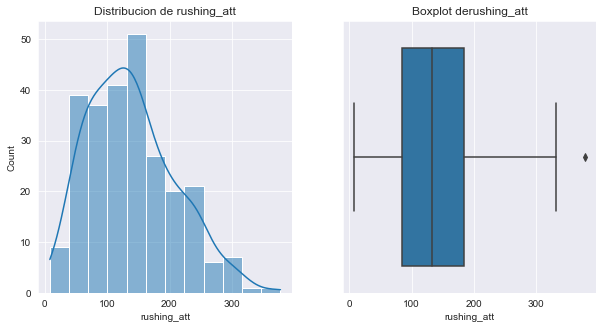

In [359]:
variable = 'rushing_att'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = jugadores_rb, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = jugadores_rb, x = f"{variable}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot derush_yds'}, xlabel='rush_yds'>

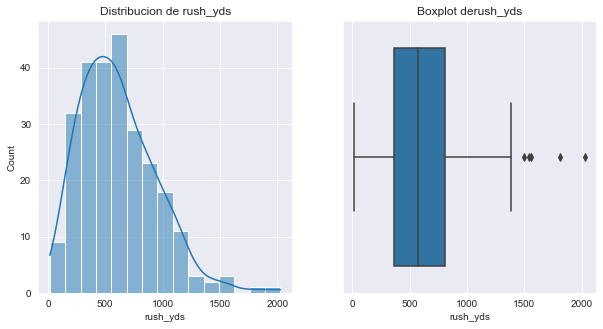

In [360]:
variable = 'rush_yds'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = jugadores_rb, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = jugadores_rb, x = f"{variable}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot derec'}, xlabel='rec'>

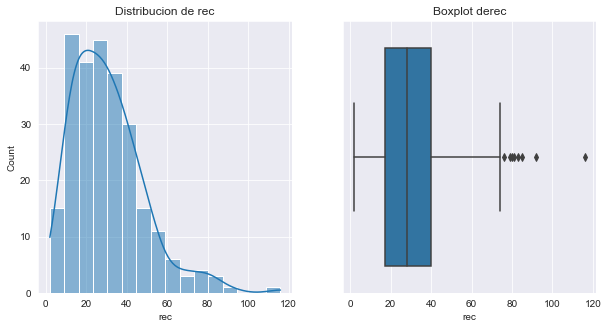

In [361]:
variable = 'rec'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = jugadores_rb, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = jugadores_rb, x = f"{variable}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot derec_yds'}, xlabel='rec_yds'>

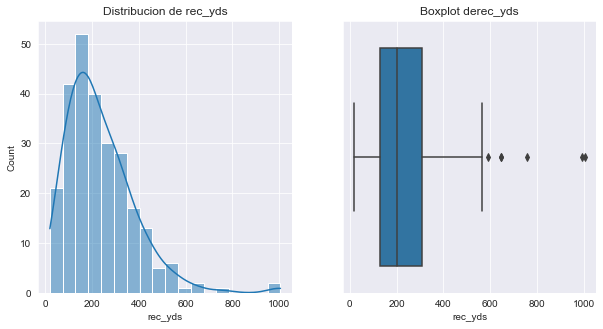

In [238]:
variable = 'rec_yds'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = jugadores_rb, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = jugadores_rb, x = f"{variable}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot detd_tot'}, xlabel='td_tot'>

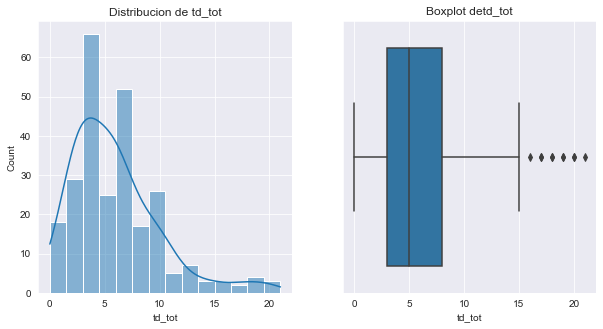

In [240]:
variable = 'td_tot'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = jugadores_rb, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = jugadores_rb, x = f"{variable}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot deyds_x_rec'}, xlabel='yds_x_rec'>

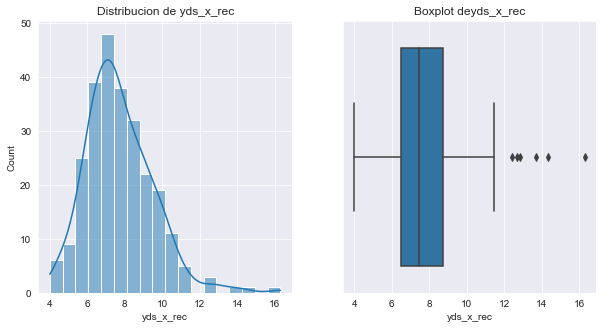

In [340]:
variable = 'yds_x_rec'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = jugadores_rb, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = jugadores_rb, x = f"{variable}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot deyds_x_att'}, xlabel='yds_x_att'>

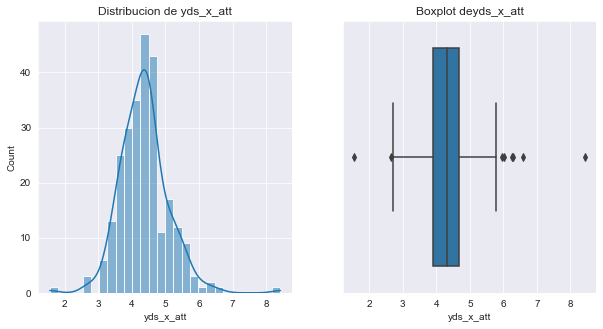

In [341]:
variable = 'yds_x_att'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = jugadores_rb, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = jugadores_rb, x = f"{variable}", ax=ax[1])

In [670]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
jugadores_rb['td_tot'],jugadores_rb['rushing_att'],jugadores_rb['rush_yds'], jugadores_rb['rec'], jugadores_rb['rec_yds'], jugadores_rb['yds_x_rec'], jugadores_rb['yds_x_att']= rb_scaler.fit_transform(jugadores_rb[['td_tot','rushing_att','rush_yds', 'rec', 'rec_yds', 'yds_x_att', 'yds_x_rec']]).T
jugadores_rb.head()

,age,rushing_att,rush_yds,yds_x_att,rush_tds,targets,rec,rec_yds,yds_x_rec,rec_tds,...,player_Saquon Barkley,player_Sony Michel,player_Tarik Cohen,player_Tevin Coleman,player_Todd Gurley,player_Tony Pollard,player_Travis Homer,player_Ty Johnson,player_Wayne Gallman,player_Zack Moss
0,23,1.459716,1.744086,0.675159,15.0,142.0,3.659574,4.449438,0.493333,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,1.611374,2.073118,0.993631,16.0,24.0,-0.510638,-0.039326,1.728889,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25,0.976303,1.092473,0.369427,16.0,68.0,0.808511,1.466292,0.942222,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24,1.592417,1.679570,0.267516,12.0,71.0,1.021277,1.162921,0.102222,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24,1.109005,1.202151,0.305732,13.0,63.0,0.978723,1.719101,0.995556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


veo las distribuciones de cada variable numerica y como todas tienen outliers hago un escalado robusto porque no es muy afectado por los outliers. los outliers no son eliminados porque son los jugadores que mas puntos hicieron.

## encoding de variables categoricas

In [671]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(jugadores_rb[['player']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
rb_encoded = ohe.transform(jugadores_rb[['player']])

jugadores_rb[ohe.get_feature_names_out()] = rb_encoded


jugadores_rb.drop(columns='player', inplace = True)

KeyError: "None of [Index(['player'], dtype='object')] are in the [columns]"

pongo los jugadores en filas en vez de columnas para poder hacer el encoding de la variable clasificacion que es la target.

In [ ]:
from sklearn.preprocessing import LabelEncoder

jugadores_rb['clasificacion'] = LabelEncoder().fit_transform(jugadores_rb['clasificacion'])
jugadores_rb
#donde la clasificacion es 1 significa que el jugador es malo si es 0 significa que es bueno


## creacion del modelo

In [672]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = jugadores_rb.drop(columns=['clasificacion'])
y = jugadores_rb['clasificacion']

model = LogisticRegression(solver='lbfgs', max_iter=5000)

scores = cross_val_score(model, X, y, cv=5)
base_model_score = scores.mean()

base_model_score

0.8790940766550521

In [673]:
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

model = LogisticRegression(solver='lbfgs', max_iter=1000)
cv_results = cross_validate(model, X, y, cv = 5)
score = cv_results["test_score"].mean()
print(f"Antes de la permutacion, el score del modelo es: {round(score,2)}")


model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df

Antes de la permutacion, el score del modelo es: 0.88
Despues de la permutacion de variables, asi decrece el score en terminos de variables:


,feature,feature_importance
4,rush_tds,0.087246
7,rec_yds,0.058502
14,td_x_gm,0.040338
3,yds_x_att,0.031739
6,rec,0.017971
...,...,...
20,player_Alexander Mattison,-0.000048
134,player_Zack Moss,-0.000048
30,player_Carlos Hyde,-0.000097
36,player_Chuba Hubbard,-0.000097


In [674]:
threshold = 0.05

# Decompose this one-liner piece of code step by step if you don't understand it at first sight!
weak_features = importance_df[importance_df.feature_importance <= threshold]["feature"].values
weak_features

array(['td_x_gm', 'yds_x_att', 'rec', 'rush_yds', 'yds_x_rec', 'age',
       'rec_tds', 'player_Kareem Hunt', 'fumbles',
       'player_Ronald Jones II', 'player_Jamaal Williams',
       'player_Clyde Edwards-Helaire', 'player_Duke Johnson',
       'player_Devin Singletary', 'player_Michael Carter', 'fum_lst',
       'player_J.D. McKissic', 'player_Christian McCaffrey',
       'player_Joe Mixon', 'player_James Conner', 'targets',
       'player_David Montgomery', 'player_Salvon Ahmed',
       'player_Sony Michel', 'player_Todd Gurley',
       'player_Leonard Fournette', 'player_Austin Ekeler',
       'player_Saquon Barkley', 'player_Royce Freeman',
       'player_Raheem Mostert', 'player_Rashaad Penny',
       'player_Giovani Bernard', 'player_Kenyan Drake',
       'player_Tarik Cohen', 'player_Latavius Murray',
       'player_Boston Scott', 'player_AJ Dillon',
       'player_Damien Williams', 'player_Darrel Williams',
       'player_Elijah Mitchell', "player_Le'Veon Bell",
       'pla

saco las variables con poca importancia aquellas con una importancia menor a 0.05 la accuracy del modelo esdel 85% que esta bien porque no esta siendo ni muy perfecto ni es muy bajo, es decir que no hay overfitting ni underfitting

In [601]:
X_strong_features = jugadores_rb.drop(columns=list(weak_features) + ["clasificacion"])

print(f"Las variables fuertes son {list(X_strong_features.columns)}")

model = LogisticRegression()

scores = cross_val_score(model, X_strong_features, y, cv = 5)
strong_model_score = scores.mean()

print(f"Antes de remover las variables el Accurracy es {round(score,2)}")

print(f"El modelo entrenado con las variables fuertes dan un accuracy de {round(strong_model_score,2)}")

Las variables fuertes son ['rush_tds', 'rec_yds']
Antes de remover las variables el Accurracy es 0.85
El modelo entrenado con las variables fuertes dan un accuracy de 0.84


el modelo utilizando unicamente las variables fuertes tiene una accuracy mas baja, de 0.84 bajo 1%

In [602]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('Train data de clase 1:', y_train.mean())
print('Test data de clase 1:', y_test.mean())

Train data de clase 1: 0.5208333333333334
Test data de clase 1: 0.6507936507936508


la proporcion de train y test es de 52/65 no esta mal pero podria ser mejor

In [527]:
for i in range(1, 10):

    print("-"*50)
    print("##### Random state set =", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    print('Train data de clase 1:', round(y_train.mean(), 3))
    print('Test data de clase 1:', round(y_test.mean(), 3))

--------------------------------------------------
##### Random state set = 1
Train data de clase 1: 0.521
Test data de clase 1: 0.651
--------------------------------------------------
##### Random state set = 2
Train data de clase 1: 0.576
Test data de clase 1: 0.524
--------------------------------------------------
##### Random state set = 3
Train data de clase 1: 0.569
Test data de clase 1: 0.54
--------------------------------------------------
##### Random state set = 4
Train data de clase 1: 0.583
Test data de clase 1: 0.508
--------------------------------------------------
##### Random state set = 5
Train data de clase 1: 0.556
Test data de clase 1: 0.571
--------------------------------------------------
##### Random state set = 6
Train data de clase 1: 0.549
Test data de clase 1: 0.587
--------------------------------------------------
##### Random state set = 7
Train data de clase 1: 0.535
Test data de clase 1: 0.619
--------------------------------------------------
#####

In [528]:
model_8 = LogisticRegression(solver='lbfgs', max_iter=5000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model_8.fit(X_train, y_train)

model_8.score(X_test, y_test)

0.8571428571428571

In [529]:
model_2 = LogisticRegression(solver='lbfgs', max_iter=5000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

model_2.fit(X_train, y_train)

model_2.score(X_test, y_test)

0.873015873015873

In [530]:
model_9 = LogisticRegression(solver='lbfgs', max_iter=5000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

model_9.fit(X_train, y_train)

model_9.score(X_test, y_test)

0.7936507936507936

In [531]:
model_4 = LogisticRegression(solver='lbfgs', max_iter=5000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

model_4.fit(X_train, y_train)

model_4.score(X_test, y_test)

0.7936507936507936

Estos modelos al momento de hacer la validacion nos genera una baja en el accuracy.

In [533]:
for i in range(1, 10):
    print("-"*50)
    print("##### Random state set =", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
    print('Training data share of class 1 rbs:', round(y_train.mean(), 3))
    print('Testing data share of class 1 rbs:', round(y_test.mean(), 3))

--------------------------------------------------
##### Random state set = 1
Training data share of class 1 rbs: 0.562
Testing data share of class 1 rbs: 0.556
--------------------------------------------------
##### Random state set = 2
Training data share of class 1 rbs: 0.562
Testing data share of class 1 rbs: 0.556
--------------------------------------------------
##### Random state set = 3
Training data share of class 1 rbs: 0.562
Testing data share of class 1 rbs: 0.556
--------------------------------------------------
##### Random state set = 4
Training data share of class 1 rbs: 0.562
Testing data share of class 1 rbs: 0.556
--------------------------------------------------
##### Random state set = 5
Training data share of class 1 rbs: 0.562
Testing data share of class 1 rbs: 0.556
--------------------------------------------------
##### Random state set = 6
Training data share of class 1 rbs: 0.562
Testing data share of class 1 rbs: 0.556
----------------------------------

para mantener una mejor proporcion usamos stratify para agregarle la variable deseada en este caso clasificacion. y cambiando el parametro random la proporcion se mantiene

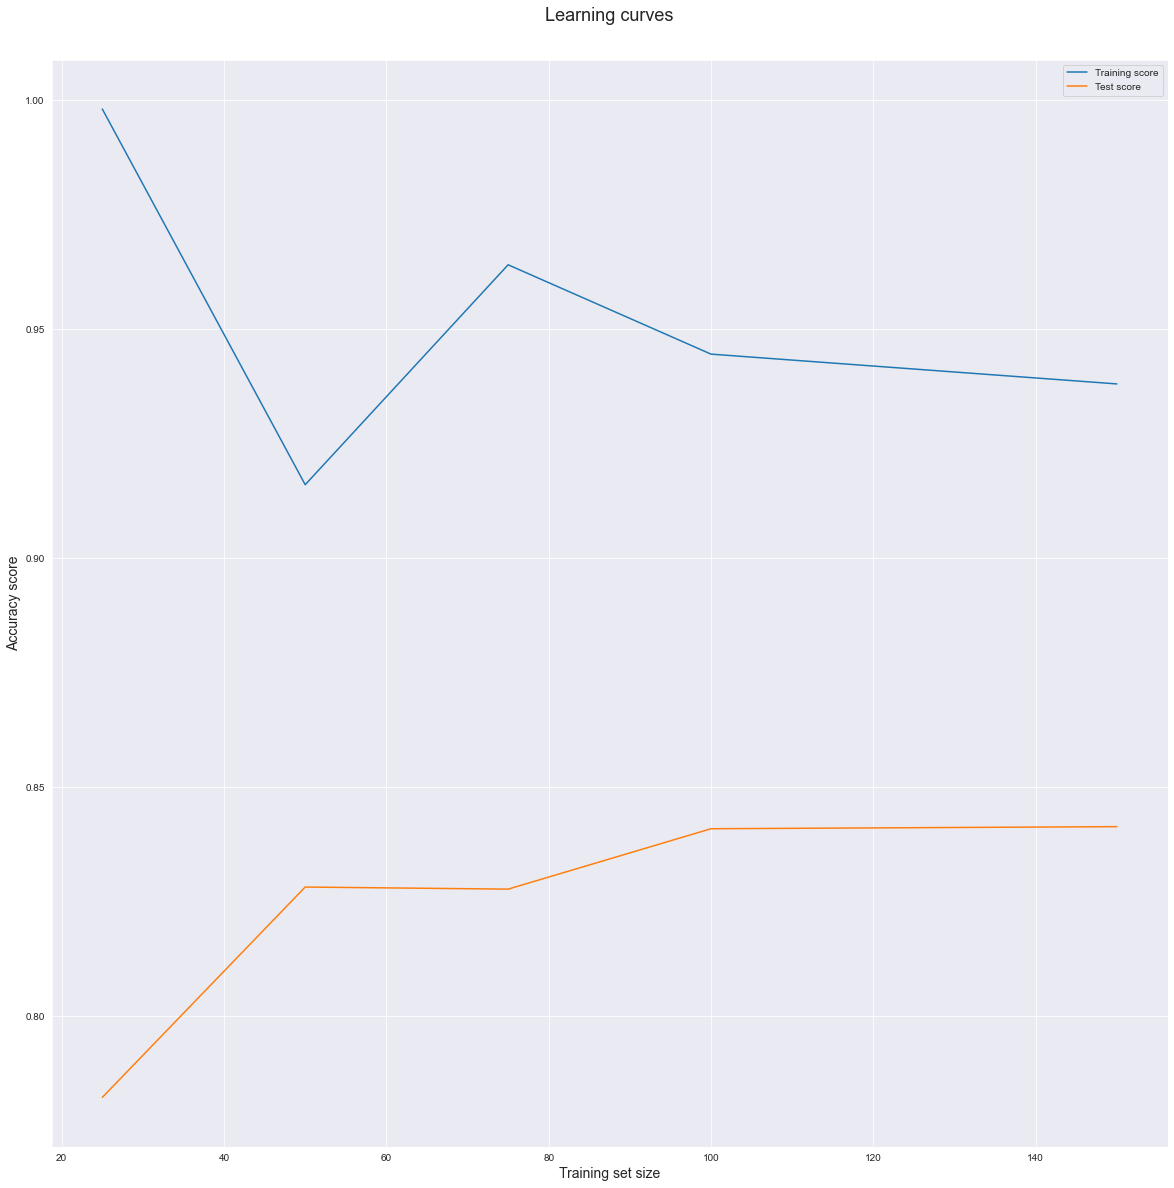

In [592]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=1000),
                                                              X = X,
                                                              y = y,
                                                              train_sizes = [25,50,75,100,150],
                                                              cv = 20)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

las curvas muestran que a medida que el dataset tiene mas filas el test score aumenta su accuracy y el training score disminuye.

## prediccion si un jugador sera bueno o malo
0 = bueno
1 = malo

In [567]:
jug_2022 = pd.read_csv("data/data-master/data-master/yearly/jugadores_2022.csv", header=[1])
jug_2022["year"] = np.where(jug_2022["Player"] == 2022, '2022', '2022')
jug_2022.columns = ["rank", "player", "team", "pos", "age", "games", "games_started", "pass_comp", "pass_att", "pass_yds","pass_tds", "ints", "rushing_att", "rush_yds", "yds_x_att", "rush_tds", "targets", "rec", "rec_yds", "yds_x_rec", "rec_tds", "fumbles", "fum_lst", "td_tot", "dos_pt_conv", "pases_dos_pt",'FantPt', 'PPR', 'DKPt', 'FDPt', 'VBD', 'posrank', 'OvRank',
       'year', '-9999']
jug_2022 = jug_2022.drop(columns={'FantPt', 'DKPt', 'FDPt', 'VBD', '-9999', 'OvRank'})

In [574]:
jug_rb_22 = jug_2022.loc[jug_2022["pos"]== "RB"]

,rank,player,team,pos,age,games,games_started,pass_comp,pass_att,pass_yds,...,yds_x_rec,rec_tds,fumbles,fum_lst,td_tot,dos_pt_conv,pases_dos_pt,PPR,posrank,year
48,49,Dameon Pierce,HOU,RB,22,12,12,0,0,0,...,5.5,1,3,1,4,NaN,NaN,154.6,15,PierDa01


In [660]:
jug_rb_22 = jug_rb_22.loc[jug_rb_22["PPR"]>60]
jug_rb_22["pts_x_gm"] = jug_rb_22["PPR"]/ jug_rb_22["games"]
jug_rb_22["td_x_gm"] = jug_rb_22["PPR"]/ jug_rb_22["games"]

def clasificacion (x):
       if x > jug_rb_22.pts_x_gm.mean():
              return "bueno"
       else: return "malo"
jug_rb_22["clasificacion"] = jug_rb_22["pts_x_gm"].apply(clasificacion)

In [675]:
df_reduced = jug_rb_22.sample(n=23, random_state=1)
X_reduced = df_reduced[['yds_x_rec','td_x_gm','yds_x_att']]
y_reduced = df_reduced['clasificacion']

# 5-Fold Cross validate model
cv_results = cross_validate(LogisticRegression(max_iter=1000), X_reduced, y_reduced, cv=5)

# Mean of accuracies
reduced_training_accuracy = cv_results['test_score'].mean()

reduced_training_accuracy

0.96

utilizando un dataframe mas chico con las 4 variables con mas fuerza obtenidas previamente el training accuracy es mayor

In [677]:
from sklearn.linear_model import LogisticRegression

# Instanciate the model
log_model = LogisticRegression(max_iter=100)

# Train the model on the training data
log_model.fit(np.array(X_reduced), y_reduced)

# Use the trained model to predict
#'rec','rec_tds','rush_tds','yds_x_att'
prediction = log_model.predict([[30,1,4.5]])[0]

prediction

'malo'

al usar los numeros de dameon pierce el modelo dice que el jugador va a terminar la temporada como uno bueno.